<b>Задание</b>
* [1. Восстановите пропуски в столбце kitchen_area.](#1)
* [2. Добавьте информацию из датасета region.csv.](#2)
* [3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.](#3)
* [4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.](#4)
* [5. Когда выгодно покупать/продавать объект недвижимости?](#5)
* [6. Создайте модель прогноза цены объекта недвижимости.](#6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st
from scipy.optimize import curve_fit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, RidgeCV

In [2]:
df = pd.read_csv('realty_18_21.csv')
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [4]:
df.describe()

,price,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.223295e+06,5.477006e+06
mean,4.422029e+06,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062850e+01,3.945399e+00
std,2.150752e+07,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.935187e+00,4.558357e+00
min,-2.144967e+09,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [5]:
#Заменим тип данных в столбце 'date'
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 417.9 MB


In [6]:
#Пропуски только в одном столбце
df.isna().sum()

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     253711
object_type           0
dtype: int64

In [7]:
df[df['kitchen_area'].isna()]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
19,1650000,2018-03-16,2843,3,5,5,2,51.00,NaN,1
42,4400000,2018-04-14,81,3,11,14,2,54.00,NaN,1
78,2980000,2018-06-04,4417,1,7,9,2,52.00,NaN,1
114,2900000,2018-07-12,81,3,2,9,1,37.50,NaN,1
136,5800000,2018-07-31,2661,2,6,14,1,47.10,NaN,1
...,...,...,...,...,...,...,...,...,...,...
5476919,3247500,2021-05-01,6543,0,7,12,-1,43.30,NaN,11
5476924,4250770,2021-05-01,6543,0,12,12,2,59.87,NaN,11
5476979,23319120,2021-05-01,3,2,2,11,3,96.36,NaN,11
5476982,13403880,2021-05-01,3,2,4,23,2,59.10,NaN,11


In [8]:
#Сделаем столбец с годом для удобства
df['year'] = df['date'].dt.year
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2018
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11,2021
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11,2021
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11,2021


In [9]:
#Проверим уникальные значения
for i in df.columns:
    print('В столбце', i, 'уникальные значения:',df[i].unique())

В столбце price уникальные значения: [ 6050000  8650000  4000000 ... 12503160 11831910 13316200]
В столбце date уникальные значения: ['2018-02-19T00:00:00.000000000' '2018-02-27T00:00:00.000000000'
 '2018-02-28T00:00:00.000000000' ... '2021-04-29T00:00:00.000000000'
 '2021-04-30T00:00:00.000000000' '2021-05-01T00:00:00.000000000']
В столбце region уникальные значения: [ 2661    81  2871  2843     3  3106  2922  2900  2722  6171  3230  4417
  5282  5368  3446  5520  6817  9579  2604  1010  9648  7793 13919  2860
  3019  4982  5241  3870  3991  2359  9654  2072  8090  4007 11171 10160
  7873  2594  8509 11416 11991  2880  5178 13913  6309  5952  6543  2328
  5993  2484 13098  4240  5789  1901 14880 10201  1491  2885  5794  2528
  4374  4695  5143  6937  2806 14368  5736  7121  4086   821 10582  7896
  8640  5703  8894  4249  3153  4189  2814  7929 16705    69  4963 61888]
В столбце building_type уникальные значения: [1 3 4 2 5 0]
В столбце level уникальные значения: [ 8  5 12 13  4  1  2

Есть странные значения в столбцах 'object_type' и 'rooms' <br>
Разберемся с комнатами. Знаем, что -1 - это студия. А вот -2 неизвестно. Посмотрим, сколько таких значений.

In [10]:
df[df['rooms'] == -2]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
62764,24912000,2018-09-17,2843,2,22,22,-2,415.2,40.0,11,2018
89002,25500000,2018-09-18,2661,3,1,7,-2,360.0,22.0,1,2018
112359,3150000,2018-09-21,2661,2,2,17,-2,35.0,9.0,1,2018
118076,4300000,2018-09-22,81,3,3,5,-2,61.0,5.6,1,2018
142208,57000000,2018-09-26,81,3,3,3,-2,300.0,30.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5357663,2350000,2021-04-19,3019,4,4,5,-2,9.0,10.7,1,2021
5374584,199000000,2021-04-21,2661,3,2,3,-2,9.0,25.0,1,2021
5392668,36874000,2021-04-24,2661,3,2,4,-2,9.0,19.7,1,2021
5432473,5200000,2021-04-29,81,2,7,17,-2,9.0,10.7,1,2021


In [11]:
#343 значений - удаляем
df = df[df['rooms'] != -2].reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11,2018
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11,2021
5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11,2021
5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11,2021


Перейдем к 'object_type'.

In [12]:
#Не совсем корректно записывать 1 и 11, поэтому заменим на 1 и 0
df['object_type'] = df['object_type'].replace(11, 0)

In [13]:
df[df['price'] <= 0]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
43821,-1633967296,2018-09-14,5520,1,13,22,1,38.92,NaN,0,2018
43822,-1633967296,2018-09-14,5520,1,14,22,1,38.92,17.26,0,2018
179202,0,2018-10-01,6817,3,5,10,3,104.00,15.00,1,2018
199884,-429242296,2018-10-04,9654,2,5,25,2,57.27,9.31,0,2018
208472,-1744967296,2018-10-06,9654,3,4,5,2,45.00,6.00,1,2018
...,...,...,...,...,...,...,...,...,...,...,...
5381848,-2041757296,2021-04-23,2604,3,2,4,1,41.08,9.31,0,2021
5382255,-1794967296,2021-04-23,81,1,4,5,2,56.00,9.00,1,2021
5397912,-1494967296,2021-04-26,2843,3,3,3,1,45.00,17.00,0,2021
5419085,-2094967296,2021-04-27,3991,3,14,19,1,30.00,8.00,1,2021


In [14]:
df = df[df['price'] > 0].reset_index()
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,0,2018
4,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476270,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021
5476271,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021
5476272,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5476273,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021


С предобработкой закончили. Перейдем к заданиям.

## <a class="anchor" id="1"></a> Задание 1

Восстановите пропуски в столбце kitchen_area.

Согласно СНиПу, минимальная площадь кухни в однокомнатной квартире и студии - 5м^2, а где больше комнат - 6 м^2. Проверим, совпадают ли значения с нормативом.

In [15]:
#Проверим однокомнатные 
df[(df['rooms'] == -1) & (df['kitchen_area'] < 5)]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
135,135,2991978,2018-07-31,2661,1,1,5,-1,23.60,4.6,0,2018
289,289,4990050,2018-09-08,3,2,8,15,-1,25.60,4.7,0,2018
1540,1540,590000,2018-09-08,6817,3,3,5,-1,14.00,4.0,1,2018
1560,1560,670000,2018-09-08,6817,3,3,5,-1,19.00,4.0,1,2018
1666,1666,1186793,2018-09-08,6817,1,8,9,-1,23.00,2.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476132,5476520,3865000,2021-05-01,2661,3,5,6,-1,19.49,2.0,1,2021
5476134,5476522,4580000,2021-05-01,2661,0,5,18,-1,25.00,4.0,0,2021
5476162,5476550,6350000,2021-05-01,81,2,11,32,-1,24.00,3.1,1,2021
5476208,5476596,1050000,2021-05-01,3019,1,1,9,-1,16.00,4.5,1,2021


In [16]:
df[(df['rooms'] == 1) & (df['kitchen_area'] < 5)]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
216,216,2153836,2018-08-31,2661,2,6,8,1,28.9,4.8,0,2018
227,227,1749000,2018-09-04,2843,3,1,1,1,28.0,4.0,1,2018
254,254,990000,2018-09-08,2843,2,3,3,1,17.9,4.0,1,2018
314,314,1350000,2018-09-08,2843,2,7,9,1,31.3,2.0,1,2018
362,362,1182000,2018-09-08,2843,2,4,9,1,24.4,3.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5475867,5476255,1200000,2021-05-01,3991,1,1,8,1,12.7,2.0,1,2021
5475906,5476294,2555000,2021-05-01,3991,2,17,19,1,22.3,2.0,0,2021
5476015,5476403,2915000,2021-05-01,3991,3,4,20,1,33.5,3.0,1,2021
5476019,5476407,730000,2021-05-01,3106,3,2,4,1,22.0,2.0,1,2021


Как можно увидеть, значения не соответствуют нормативу. Удалим значения.

In [17]:
df = df.query('~(rooms == 1 and kitchen_area < 5)') #Удаляем кухни в однокомнатных квартирах
df = df.query('~(rooms == -1 and kitchen_area < 5)') #Удаляем кухни в студиях
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
3,3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,0,2018
4,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476270,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021
5476271,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021
5476272,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5476273,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021


In [18]:
#Проверим остальные квартиры
df[(df['kitchen_area'] < 6) & (df['rooms'] != 1) & (df['rooms'] != -1)]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
3,3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,0,2018
51,51,1200000,2018-04-25,2871,3,5,5,2,40.7,5.5,0,2018
74,74,2400000,2018-05-31,1010,1,4,5,4,58.0,5.6,1,2018
107,107,1200000,2018-07-04,4417,3,2,5,2,43.7,5.6,1,2018
120,120,1000000,2018-07-19,1010,3,1,5,2,23.0,5.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476032,5476420,1650000,2021-05-01,5282,4,5,5,2,44.3,5.2,1,2021
5476073,5476461,1700000,2021-05-01,2922,3,6,9,2,48.0,5.0,1,2021
5476194,5476582,3550000,2021-05-01,9654,3,5,5,2,43.2,5.8,1,2021
5476216,5476604,3400000,2021-05-01,9654,3,1,5,2,44.0,5.0,1,2021


In [19]:
df = df.query('~(rooms != -1 and rooms != 1 and kitchen_area < 6)') #Удаляем кухни в квартирах по площади меньше 6
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018
4,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018
5,5,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476270,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021
5476271,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021
5476272,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021
5476273,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021


Заполним пропущенные значения.

In [20]:
df[df['kitchen_area'].isna()]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year
19,19,1650000,2018-03-16,2843,3,5,5,2,51.00,NaN,1,2018
42,42,4400000,2018-04-14,81,3,11,14,2,54.00,NaN,1,2018
78,78,2980000,2018-06-04,4417,1,7,9,2,52.00,NaN,1,2018
114,114,2900000,2018-07-12,81,3,2,9,1,37.50,NaN,1,2018
136,136,5800000,2018-07-31,2661,2,6,14,1,47.10,NaN,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
5476188,5476576,3247500,2021-05-01,6543,0,7,12,-1,43.30,NaN,0,2021
5476193,5476581,4250770,2021-05-01,6543,0,12,12,2,59.87,NaN,0,2021
5476248,5476636,23319120,2021-05-01,3,2,2,11,3,96.36,NaN,0,2021
5476251,5476639,13403880,2021-05-01,3,2,4,23,2,59.10,NaN,0,2021


In [21]:
def missing_value(group):
    group['share_kitchen_area'] = group['kitchen_area'] / group['area']
    median = group['share_kitchen_area'].median()
    group['kitchen_area'] = group['kitchen_area'].fillna(group['area'] * median)
    return group
df = df.groupby(['year', 'building_type', 'object_type', 'level', 'rooms']).apply(missing_value)
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,0.130751
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018,0.173661
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018,0.151515
4,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018,0.166667
5,5,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,2018,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476270,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021,0.148069
5476271,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021,0.143791
5476272,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021,0.136416
5476273,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021,0.362764


In [22]:
# После заполнения проверим, есть ли случаи, когда площадь кухни больше площади всей квартиры
#Таких 2858 строк
df[df['kitchen_area'] > df['area']]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
502,502,4599000,2018-09-08,9654,3,6,10,2,5.60,7.70,1,2018,1.375000
673,673,1350000,2018-09-08,9654,1,5,10,1,13.78,48.02,0,2018,3.484761
4500,4500,1570000,2018-09-08,1010,3,4,5,1,32.00,65.00,1,2018,2.031250
5740,5740,1740900,2018-09-09,9654,1,4,10,2,58.03,78.00,0,2018,1.344132
6055,6055,1350000,2018-09-09,9654,1,5,10,1,13.78,48.02,0,2018,3.484761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5098270,5098638,37884000,2021-03-01,2871,2,3,6,3,172.00,340.00,0,2021,1.976744
5158846,5159215,950000,2021-03-16,3991,3,1,3,1,15.00,23.00,1,2021,1.533333
5219569,5219941,2300000,2021-03-26,3991,3,1,5,1,31.00,60.00,1,2021,1.935484
5455043,5455431,2750000,2021-04-30,9648,4,3,3,2,45.00,45.60,1,2021,1.013333


In [23]:
#Поменяем столбцы местами только в случае, если площадь кухни больше общей площади
kitchen = df['kitchen_area'] > df['area']
df.loc[kitchen, ['area', 'kitchen_area']] = (df.loc[kitchen, ['kitchen_area', 'area']].values)
df[df['kitchen_area'] > df['area']]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area


In [24]:
#Проверим после заполнения, есть ли значения, которые не соответствуют СНиПу
df[(df['rooms'] == 1) & (df['kitchen_area'] < 5)] #Площадь кухни в однокомнатных квартирах меньше 5 - 1967

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
4004,4004,900000,2018-09-08,2900,1,5,5,1,20.0,4.186047,1,2018,NaN
7538,7538,1240000,2018-09-09,3230,1,2,9,1,23.0,4.928571,1,2018,NaN
12834,12834,600000,2018-09-10,3230,3,1,2,1,21.0,4.725000,1,2018,NaN
17319,17319,1170000,2018-09-10,2922,3,5,9,1,18.0,4.000000,1,2018,NaN
17675,17675,800000,2018-09-10,2922,3,4,5,1,22.0,4.967742,1,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468605,5468993,1600000,2021-05-01,3230,3,5,5,1,22.0,4.950000,1,2021,NaN
5469791,5470179,1550000,2021-05-01,3991,3,1,9,1,20.2,4.689286,1,2021,NaN
5471768,5472156,550000,2021-05-01,4189,3,5,5,1,18.0,4.050000,1,2021,NaN
5472649,5473037,430000,2021-05-01,2871,3,1,2,1,14.0,3.250000,1,2021,NaN


In [25]:
df[(df['rooms'] == -1) & (df['kitchen_area'] < 5)] #Площадь кухни в студии меньше 5 - 4070

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
21447,21447,1148000,2018-09-11,6817,3,3,15,-1,21.8,4.844444,0,2018,NaN
40227,40227,1350000,2018-09-13,2922,1,1,10,-1,18.2,4.827892,1,2018,NaN
45760,45762,1800000,2018-09-14,2843,4,8,8,-1,17.0,3.655914,1,2018,NaN
46893,46895,620000,2018-09-14,6817,3,3,5,-1,14.0,3.181818,1,2018,NaN
51074,51076,1800000,2018-09-15,2843,2,3,6,-1,21.0,4.630208,1,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473164,5473552,1400000,2021-05-01,5282,1,10,10,-1,23.5,3.831635,1,2021,NaN
5473267,5473655,4188200,2021-05-01,81,2,16,16,-1,21.0,4.976303,0,2021,NaN
5473951,5474339,6075017,2021-05-01,3,2,5,15,-1,18.0,4.279843,0,2021,NaN
5475301,5475689,2250000,2021-05-01,10201,1,1,10,-1,24.0,4.347826,1,2021,NaN


In [26]:
df.loc[(df['rooms'] == -1) & (df['kitchen_area'] < 5), 'kitchen_area'] = 5
df.loc[(df['rooms'] == 1) & (df['kitchen_area'] < 5), 'kitchen_area'] = 5

In [27]:
df[(df['kitchen_area'] < 6) & (df['rooms'] != 1) & (df['rooms'] != -1)] #Площадь остальных квартир меньше 6 - 2852

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
502,502,4599000,2018-09-08,9654,3,6,10,2,7.7,5.600000,1,2018,1.375
2964,2964,650000,2018-09-08,3230,1,8,9,5,17.2,1.502468,1,2018,NaN
4036,4036,1700000,2018-09-08,2922,3,3,5,2,38.0,5.960784,1,2018,NaN
4085,4085,1050000,2018-09-08,11171,5,2,2,2,33.0,5.823529,1,2018,NaN
6232,6232,4599000,2018-09-09,9654,3,6,10,2,7.7,5.600000,1,2018,1.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464848,5465236,2650000,2021-05-01,6171,1,2,9,2,36.6,5.822727,1,2021,NaN
5465714,5466102,2600000,2021-05-01,9654,1,5,5,3,43.2,5.478717,1,2021,NaN
5468515,5468903,2500000,2021-05-01,9654,3,2,2,3,38.2,5.093333,1,2021,NaN
5470991,5471379,2300000,2021-05-01,2359,1,5,5,2,36.0,5.647059,1,2021,NaN


In [28]:
df.loc[(df['kitchen_area'] < 6) & (df['rooms'] != 1) & (df['rooms'] != -1), 'kitchen_area'] = 6

In [29]:
# Проверим еще раз, есть ли случаи, когда площадь кухни больше площади всей квартиры
#Таких 189 строк
df[df['kitchen_area'] > df['area']]

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
591100,591115,1550000,2018-11-28,2722,0,2,3,2,5.0,6.0,1,2018,NaN
727019,727042,1800000,2018-12-13,2843,2,9,24,1,4.9,5.0,1,2018,NaN
731655,731678,1600000,2018-12-14,9654,3,8,14,1,4.9,5.0,1,2018,NaN
1070820,1070844,2250000,2019-02-04,2843,3,4,5,2,5.0,6.0,1,2019,NaN
1846499,1846700,4250000,2019-05-23,11171,4,4,4,3,5.8,6.0,1,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050241,4050566,1850000,2020-07-08,3446,1,1,5,1,3.3,5.0,1,2020,NaN
4087048,4087373,4500000,2020-07-15,81,1,1,10,2,5.3,6.0,1,2020,NaN
4255078,4255405,2150000,2020-08-08,4982,3,10,10,1,4.6,5.0,1,2020,NaN
4340243,4340574,1800000,2020-09-05,2843,3,1,2,3,4.6,6.0,1,2020,NaN


Можно заметить, что здесь даже если мы поменяем значения в столбцах местами, то получится, что площадь кухни будет равна площади квартиры даже не в однокомнатных квартирах и студиях. Удалим эти значения и проверим, есть ли еще такие случаи.

In [30]:
df[df['kitchen_area'] == df['area']] #Число строк, где площадь кухни равна площади всей квартиры, равно 1542

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
3055,3055,950000,2018-09-08,9654,3,2,9,-1,22.0,22.0,1,2018,1.0
4111,4111,1200000,2018-09-08,2359,3,3,9,-1,23.0,23.0,0,2018,1.0
7418,7418,450000,2018-09-09,6171,3,1,2,1,30.6,30.6,1,2018,1.0
12682,12682,1600000,2018-09-10,2604,3,1,5,-1,26.5,26.5,1,2018,1.0
16236,16236,1650000,2018-09-10,10160,1,3,5,2,6.0,6.0,1,2018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5413620,5414006,1600000,2021-04-27,9654,1,10,17,-1,20.0,20.0,1,2021,1.0
5448527,5448915,1958000,2021-04-30,5282,3,5,14,1,37.0,37.0,1,2021,1.0
5458595,5458983,2300000,2021-04-30,3991,0,5,16,1,23.5,23.5,1,2021,1.0
5459872,5460260,1050000,2021-04-30,3991,0,4,5,1,18.0,18.0,1,2021,1.0


In [31]:
df[df['kitchen_area'] == df['area']]['rooms'].unique()

array([-1,  1,  2,  4,  3,  5], dtype=int64)

 Если студии это можно простить, то в остальных случаях это вряд ли. Нужно их удалить. Посмотрим, сколько таких значений.

In [32]:
df[(df['kitchen_area'] == df['area']) & (df['rooms'] != -1)]
#Таких строк 1166 

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
7418,7418,450000,2018-09-09,6171,3,1,2,1,30.6,30.6,1,2018,1.0
16236,16236,1650000,2018-09-10,10160,1,3,5,2,6.0,6.0,1,2018,1.0
16564,16564,1900000,2018-09-10,2843,2,2,6,1,25.0,25.0,1,2018,1.0
40450,40450,1000000,2018-09-13,2900,3,13,16,1,25.0,25.0,1,2018,1.0
48324,48326,780000,2018-09-14,2722,0,5,5,1,14.3,14.3,1,2018,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5342734,5343113,1700000,2021-04-15,5520,3,8,15,1,25.0,25.0,1,2021,1.0
5448527,5448915,1958000,2021-04-30,5282,3,5,14,1,37.0,37.0,1,2021,1.0
5458595,5458983,2300000,2021-04-30,3991,0,5,16,1,23.5,23.5,1,2021,1.0
5459872,5460260,1050000,2021-04-30,3991,0,4,5,1,18.0,18.0,1,2021,1.0


In [33]:
df = df[df['kitchen_area'] < df['area']]
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,share_kitchen_area
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,0.130751
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018,0.173661
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018,0.151515
4,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018,0.166667
5,5,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,2018,0.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476270,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021,0.148069
5476271,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021,0.143791
5476272,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021,0.136416
5476273,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021,0.362764


In [34]:
df = df.drop(columns = ['share_kitchen_area'], axis = 1)
df.isna().sum()

index            0
price            0
date             0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
year             0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155335 entries, 0 to 5476274
Data columns (total 12 columns):
 #   Column         Dtype         
---  ------         -----         
 0   index          int64         
 1   price          int64         
 2   date           datetime64[ns]
 3   region         int64         
 4   building_type  int64         
 5   level          int64         
 6   levels         int64         
 7   rooms          int64         
 8   area           float64       
 9   kitchen_area   float64       
 10  object_type    int64         
 11  year           int64         
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 511.3 MB


## <a class="anchor" id="2"></a> Задание 2

Добавьте информацию из датасета region.csv.

In [38]:
df_region = pd.read_csv('region.csv') #загружаем файл

In [39]:
df_region

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
78,16705,Магаданская область
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область


In [40]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   code      83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [41]:
df_region['code'] = df_region['code'].astype(int)
df_region.info()

ValueError: invalid literal for int() with base 10: '7873, 6937'

Проблема в данных. Надо посмотреть.

In [42]:
df_region[df_region['code'].str.contains('7873, 6937')]

,code,reg_name
36,"7873, 6937",Республика Крым


In [43]:
df_region['code'] = df_region['code'].str.replace('7873, 6937', '7873')
new = {'code': '6937', 'reg_name': 'Республика Крым'}
df_region = df_region.append(new, ignore_index=True)

C:\Users\nelli\AppData\Local\Temp\ipykernel_27932\3866599845.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_region = df_region.append(new, ignore_index=True)


In [44]:
df_region['code'] = df_region['code'].astype(int)

In [45]:
df_region.columns = ('region', 'reg_name')
df = df.merge(df_region, on='region', how='left')
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,reg_name
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,Санкт-Петербург
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018,Московская область
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018,Нижегородская область
3,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018,Московская область
4,5,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,2018,Московская область
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155330,5476658,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,0,2021,Москва
5155331,5476659,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,0,2021,Москва
5155332,5476660,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,2021,Нижегородская область
5155333,5476661,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,0,2021,Москва


## <a class="anchor" id="3"></a>Задание 3

Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.

<AxesSubplot:>

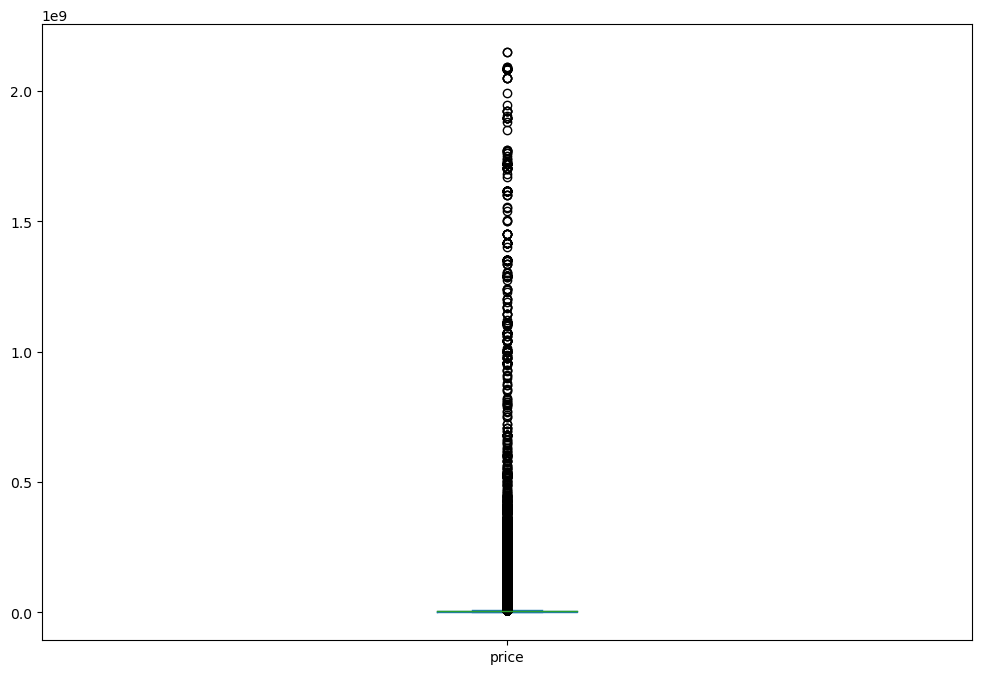

In [46]:
plt.rcParams['figure.figsize'] = (12, 8)
df['price'].plot(kind='box')

In [47]:
#Много выбросов
q75 = np.percentile(df['price'], 75)
q25 = np.percentile(df['price'], 25)
iqr = (q75 - q25)
ejection_h = q75 + iqr * 1.5
ejection_l = q25 - iqr * 1.5

print (ejection_l, ejection_h)

-2429500.0 9382500.0


Нижняя граница отрицательная. Цена не может быть отрицательной. Заменим нижнюю границу на ноль.

In [48]:
ejection_l = 0
#Количество выбросов
n_ejection = df['price'][(df['price'] > ejection_h) | (df['price'] < ejection_l)].count()
print('Число выбросов равно', n_ejection)

Число выбросов равно 403442


In [49]:
print('Процент выбросов составляет:', (n_ejection/df['price'].count())*100)

Процент выбросов составляет: 7.825718406272338


<AxesSubplot:>

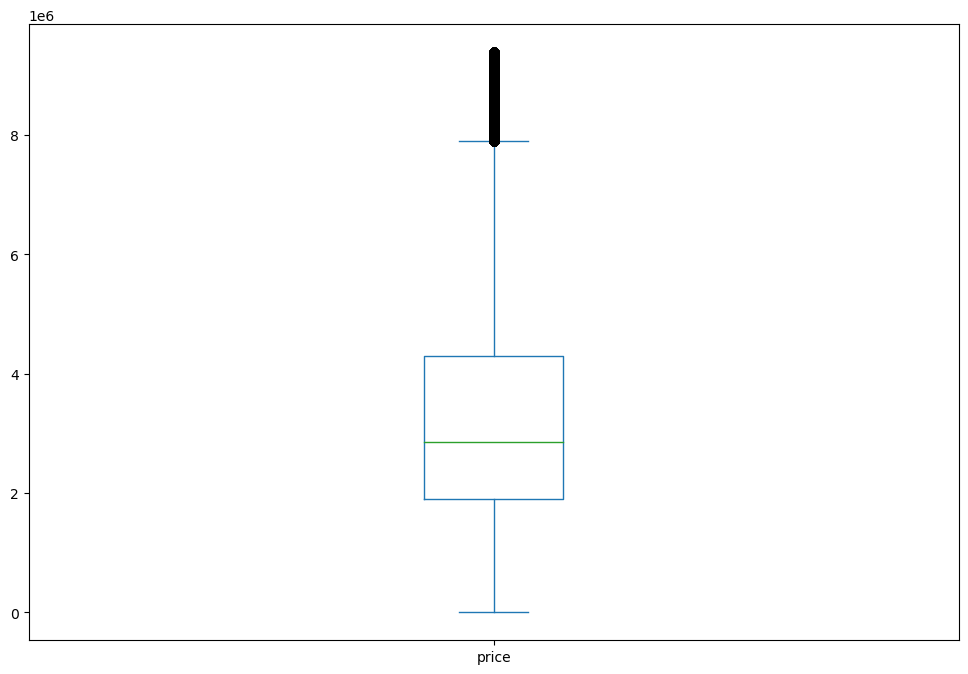

In [50]:
#Удаляем выбросы
df = df[(df['price'] > ejection_l) & (df['price'] <= ejection_h)]
df = df.reset_index(drop=True)
df['price'].plot(kind='box')

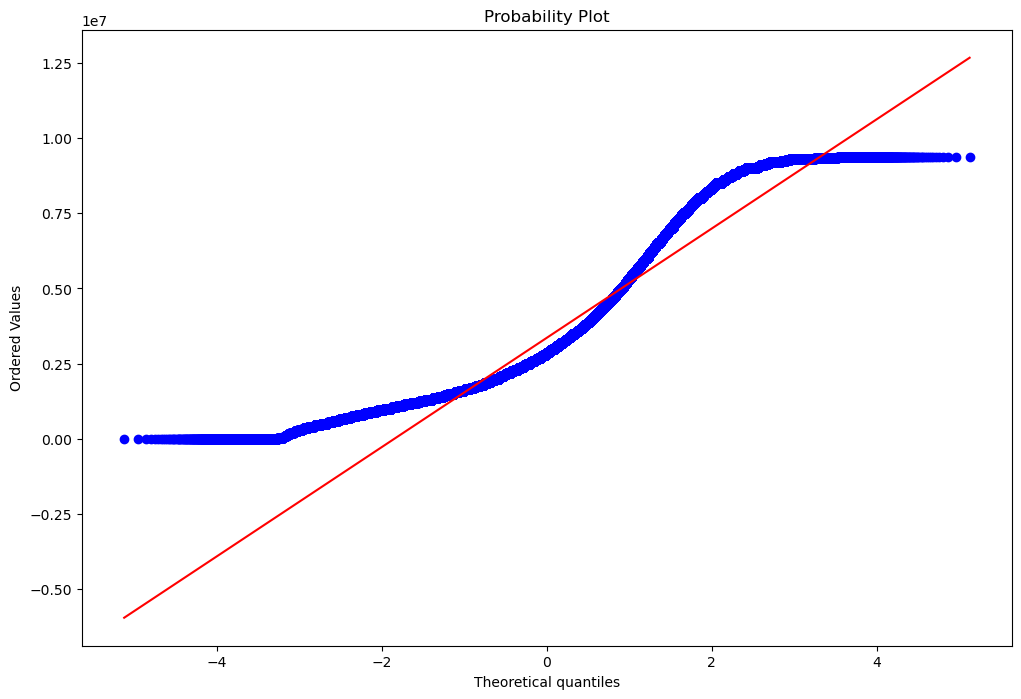

In [51]:
st.probplot(df['price'], dist='norm', plot=plt)
plt.show()

Необходимо рассчитать цену на м2.

In [52]:
df['price_per_m2'] = df['price'] / df['area']

<AxesSubplot:>

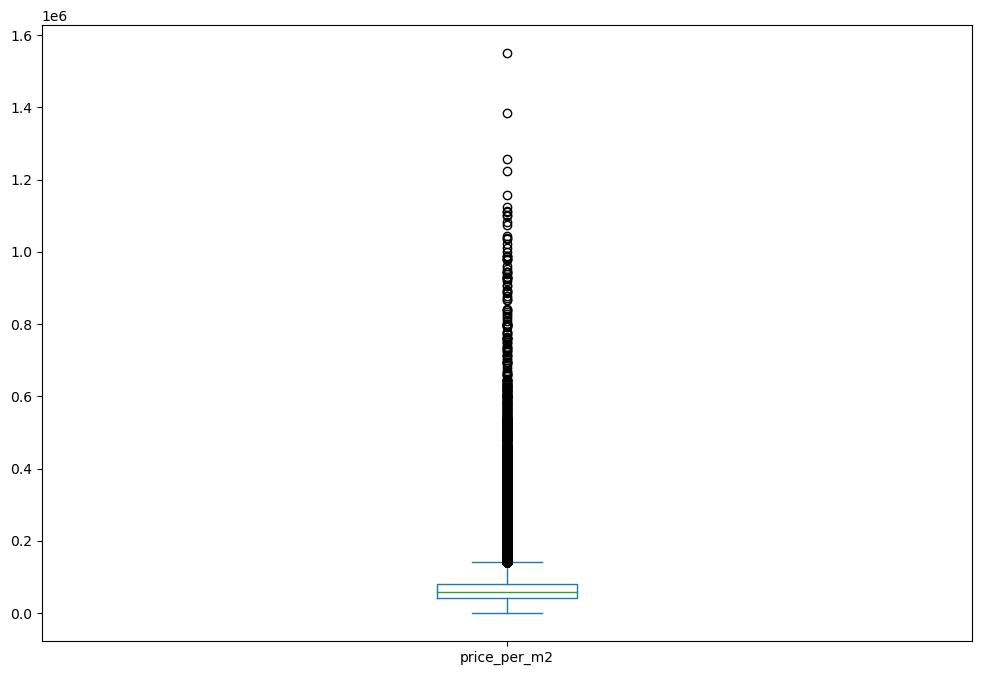

In [53]:
df['price_per_m2'].plot(kind='box')

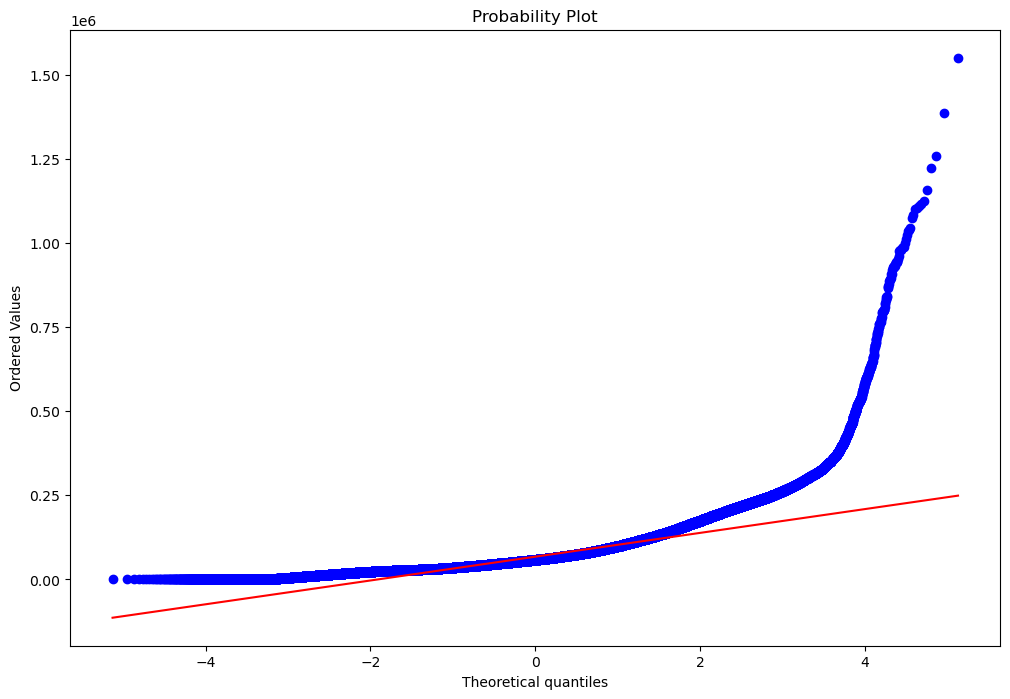

In [54]:
st.probplot(df['price_per_m2'], dist='norm', plot=plt)
plt.show()

На графике QQ-plot видно, что распределение не является нормальным.

In [55]:
#Построим матрицу корреляции с учетом того, что есть выбросы
matrix = df.corr(method='kendall')
matrix['price_per_m2']

C:\Users\nelli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


index            0.164836
price            0.605888
region          -0.321296
building_type    0.021287
level            0.177331
levels           0.257724
rooms           -0.099024
area            -0.092617
kitchen_area     0.087609
object_type      0.000089
year             0.173847
price_per_m2     1.000000
Name: price_per_m2, dtype: float64

Как можно заметить, связь c большинством показателей слабая. В качестве исследования возьмем регион, число этажей, год и этаж.

### Изменение цены за м2 от региона

In [56]:
reg = pd.pivot_table(data=df, index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
reg

,reg_name,price_per_m2
29,Москва,165000.000000
63,Санкт-Петербург,114777.777778
30,Московская область,88648.648649
1,Амурская область,85220.500596
26,Ленинградская область,84893.617021
...,...,...
53,Республика Марий Эл,37468.750000
78,Челябинская область,37272.727273
24,Курганская область,36863.675582
49,Республика Калмыкия,34971.359697


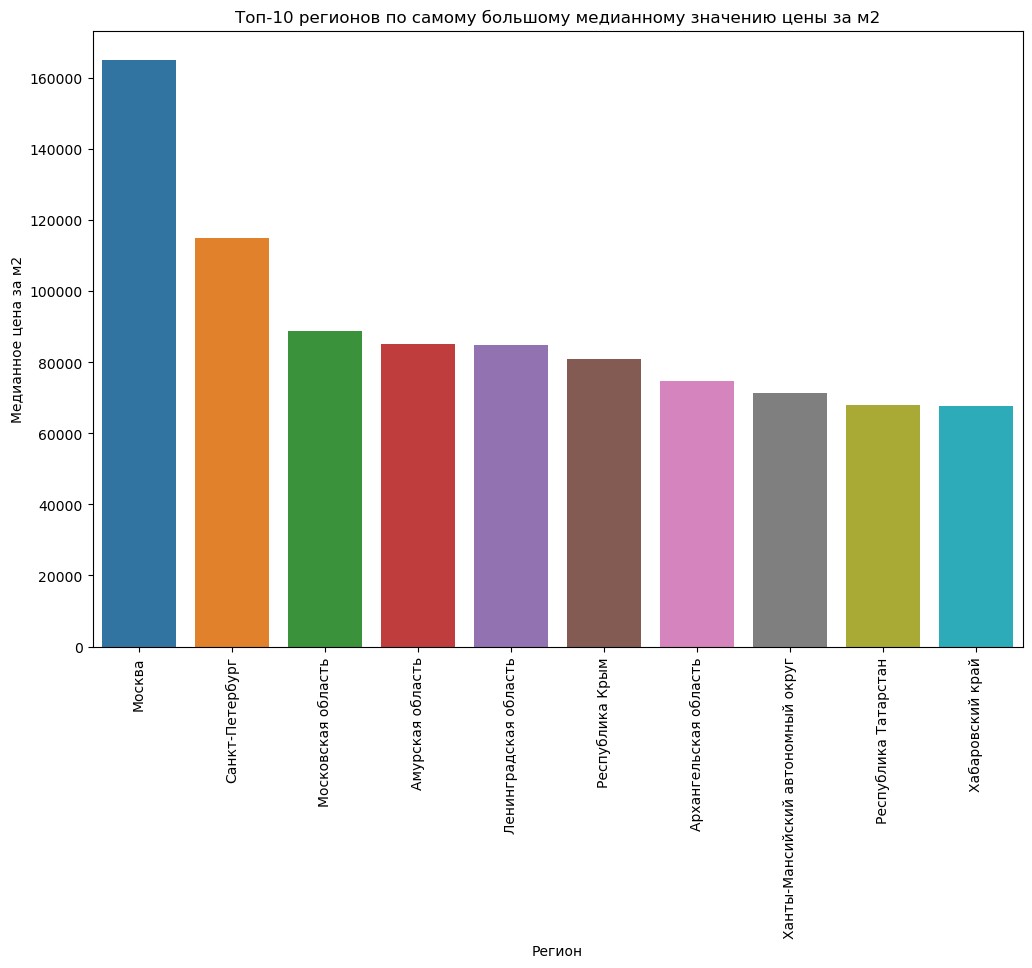

In [57]:
sns.barplot(data=reg.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

Вывод: самая высокая цена за м2 в Москве, что логично. Второй регион - Санкт-Петербург, что тоже вполне очевидно. Замыкает тройку лидеров Москвоская область. Но это в целом. Интересно посмотреть распределение по годам.

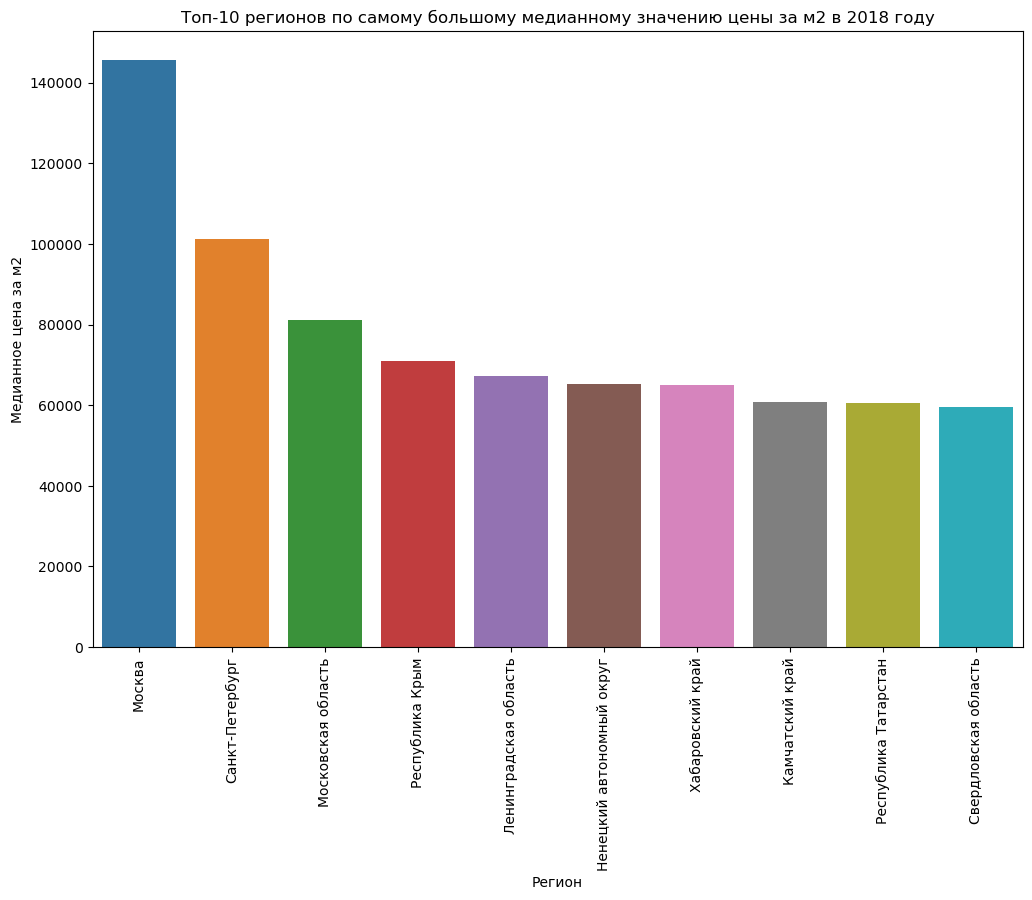

In [58]:
reg18 = pd.pivot_table(data=df.query('year == 2018'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg18.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 в 2018 году', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

В 2018 году наибольшая медианная цена за м2 представлена в Москве, Санкт-Петербурге и Московской области. Самое большое значение превышает 140 000 руб на м2.

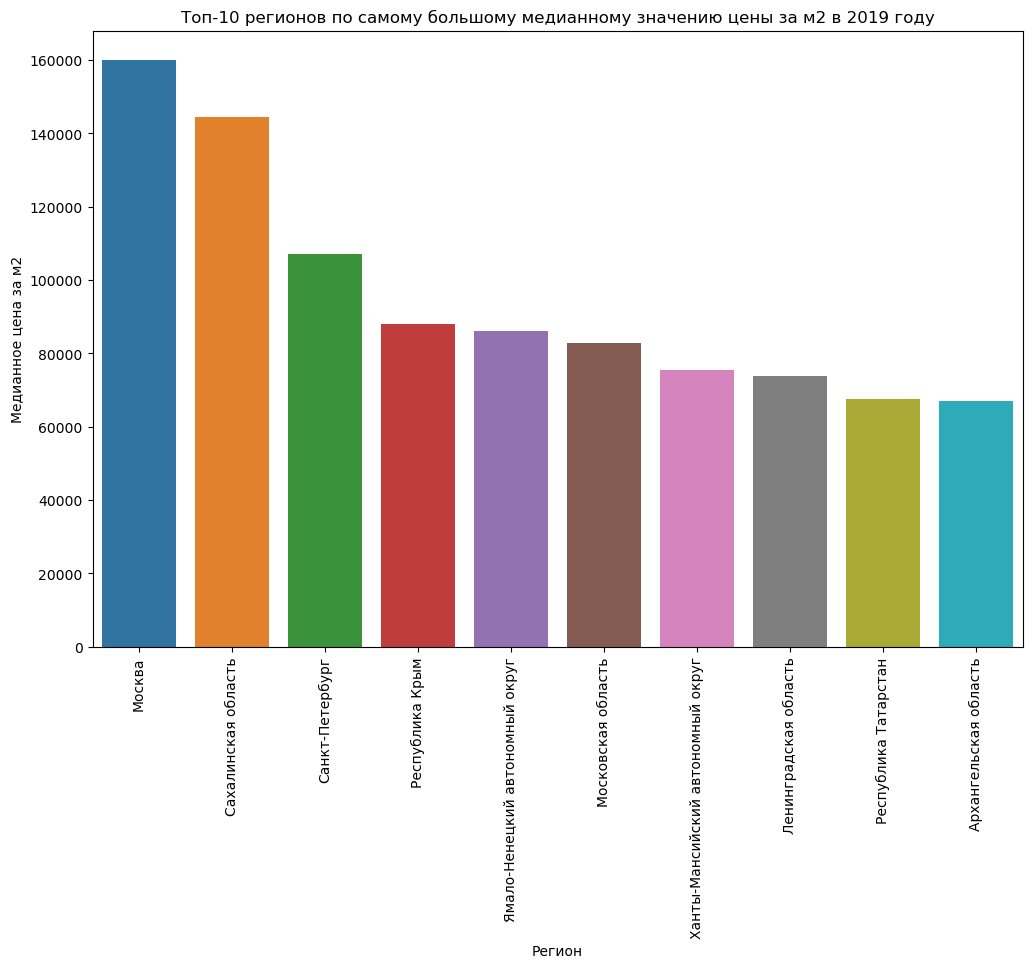

In [59]:
reg19 = pd.pivot_table(data=df.query('year == 2019'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg19.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 в 2019 году', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

В 2019 году в тройку лидеров входят Москва, Сахалинская область и Санкт-Петербург. Судя по информации в интернете, в Сахалинской области в 2019 году средняя цена за м2 не поднималась выше 130 000 рублей. Возможно, это проблема в данных.

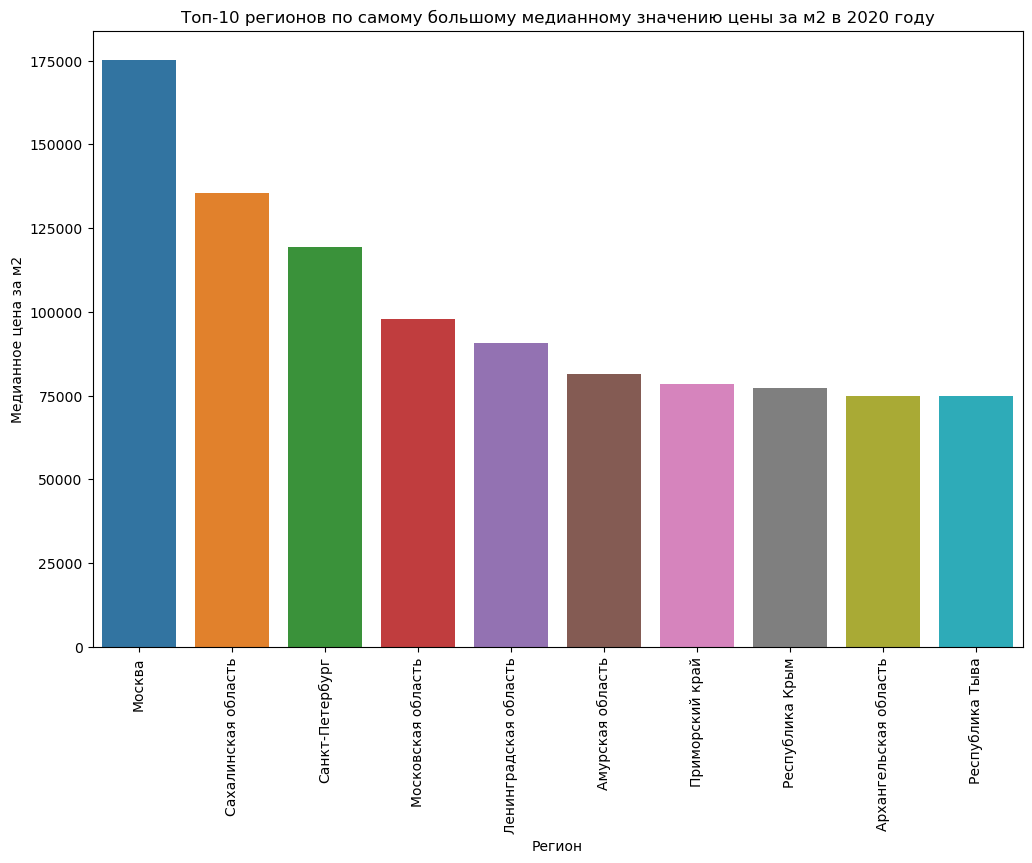

In [60]:
reg20 = pd.pivot_table(data=df.query('year == 2020'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg20.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 в 2020 году', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

Ситуация такая же, как и в 2019 году. Посмотрев информацию о ценах в Сахалинской области, могу сказать, что здесь результат уже ближе к правде.

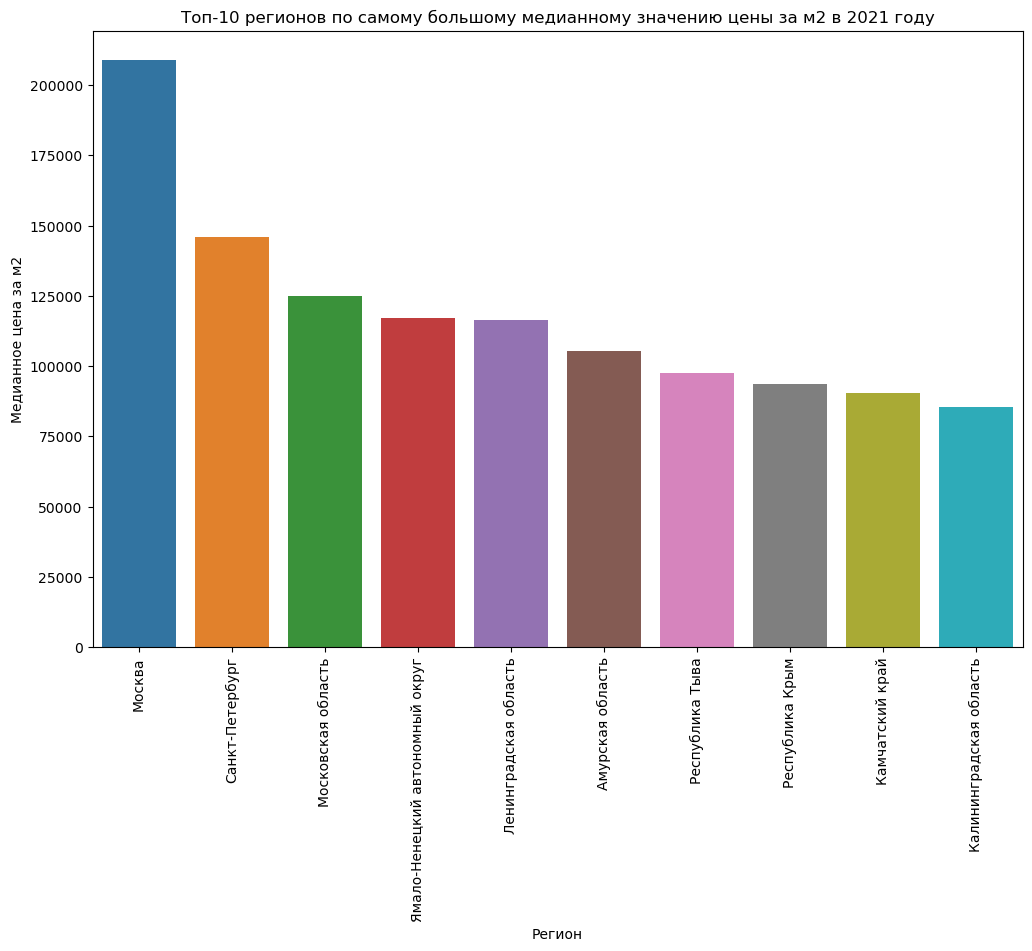

In [61]:
reg21 = pd.pivot_table(data=df.query('year == 2021'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg21.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 в 2021 году', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

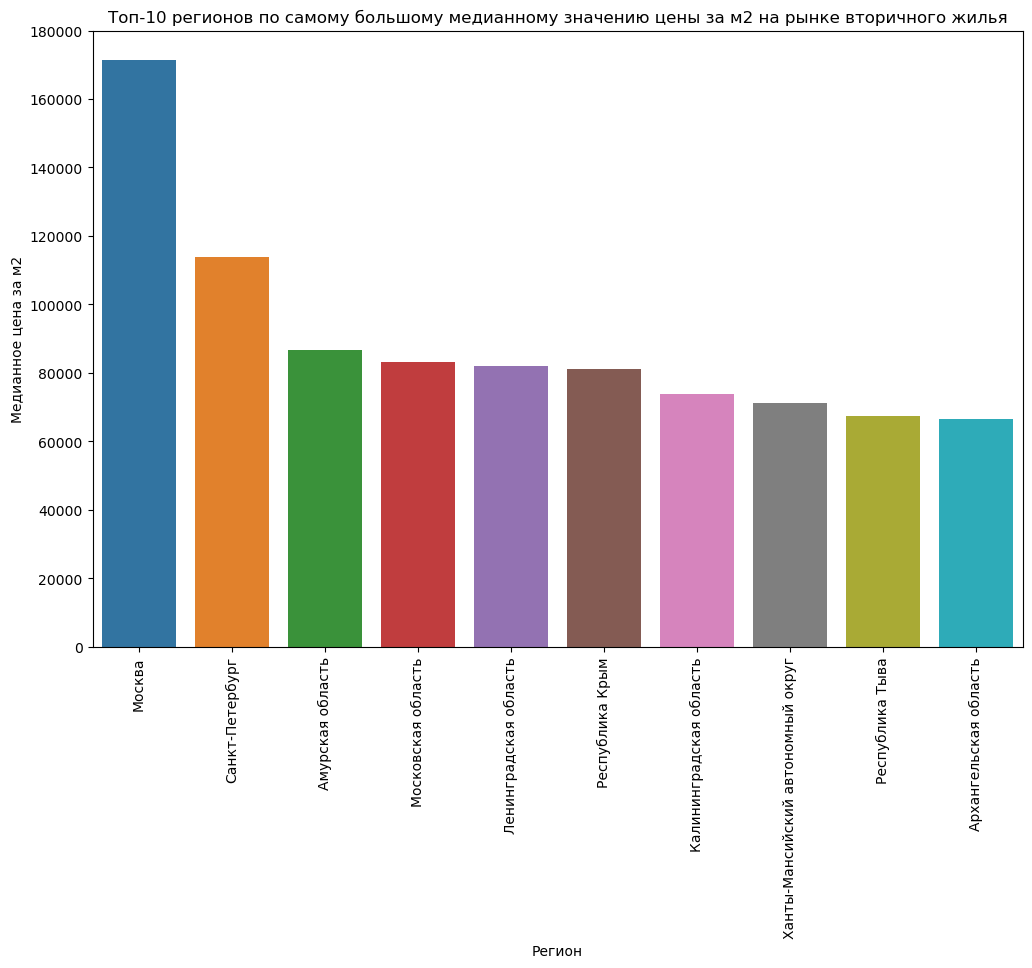

In [62]:
reg1 = pd.pivot_table(data=df.query('object_type == 1'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg1.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 на рынке вторичного жилья', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

Самое большое значение медианной цены за м2 на рынке вторичного жилья в Москве.

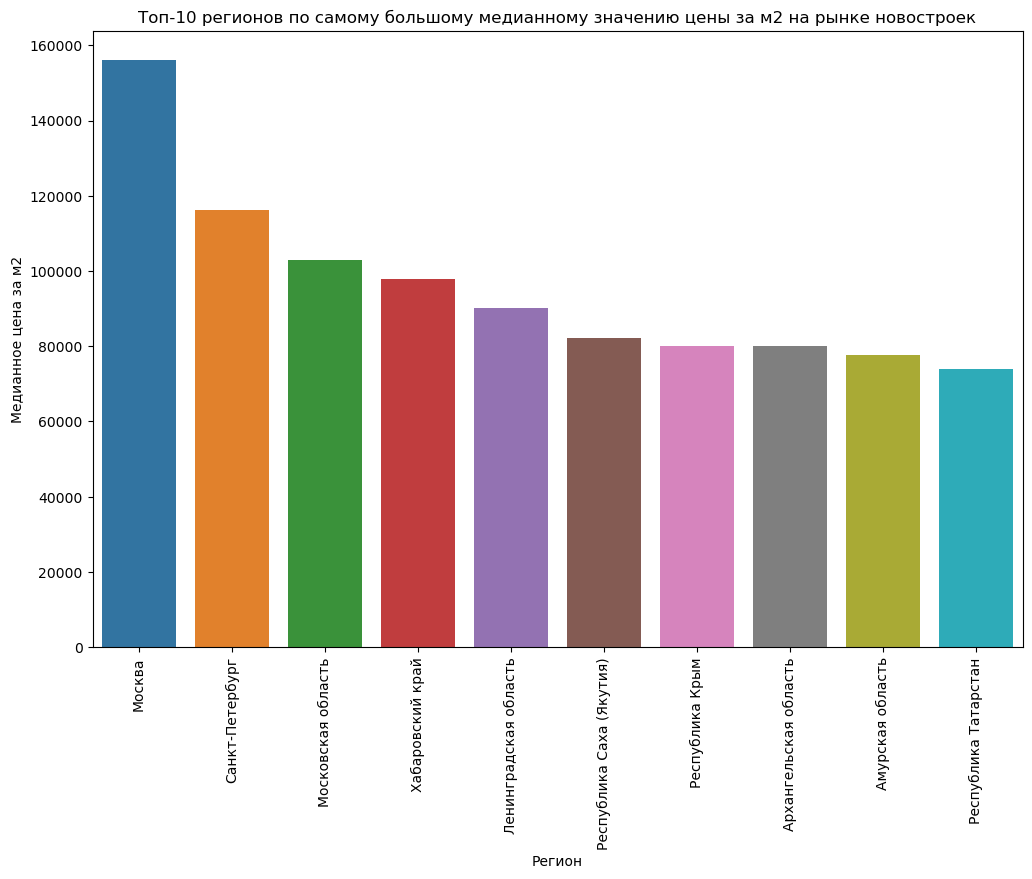

In [63]:
reg2 = pd.pivot_table(data=df.query('object_type == 0'), index='reg_name', values='price_per_m2', aggfunc='median').reset_index().sort_values(by='price_per_m2', ascending=False)
sns.barplot(data=reg2.head(10), x='reg_name', y='price_per_m2', ci=None).set(title='Топ-10 регионов по самому большому медианному значению цены за м2 на рынке новостроек', xlabel='Регион', ylabel='Медианное цена за м2')
plt.xticks(rotation=90)
plt.show()

На рынке новостроек тоже лидирует Москва. Но медианная цена за м2 на рынке новостроек ниже, чем цена на рынке вторичного жилья.

### Изменение цены за м2 от года

In [64]:
years = pd.pivot_table(data=df, index='year', values='price_per_m2', aggfunc='median').reset_index()
years

,year,price_per_m2
0,2018,52000.000000
1,2019,53359.683794
2,2020,62962.962963
3,2021,74754.901961


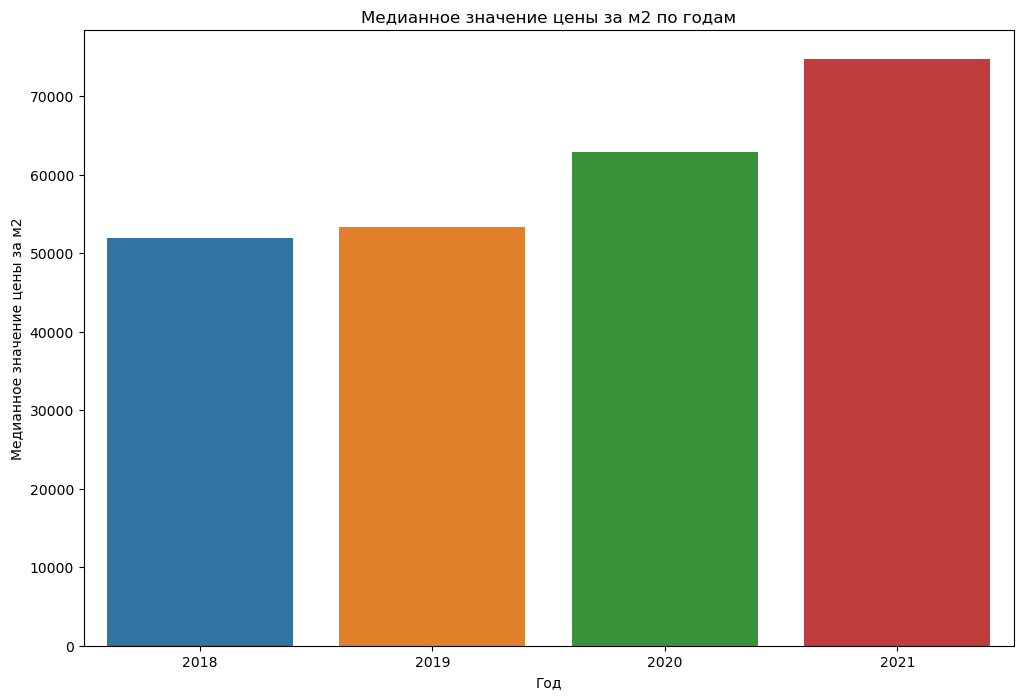

In [65]:
sns.barplot(data=years, x='year', y='price_per_m2', ci=None).set(title='Медианное значение цены за м2 по годам', xlabel='Год', ylabel='Медианное значение цены за м2')
plt.show()

In [66]:
df['month'] = df['date'].dt.month
df

,index,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,year,reg_name,price_per_m2,month
0,0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,2018,Санкт-Петербург,73244.552058,2
1,1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,2018,Московская область,125180.897250,2
2,2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,2018,Нижегородская область,60606.060606,2
3,4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,2018,Московская область,90833.333333,3
4,5,3300000,2018-03-02,81,1,4,5,1,32.0,6.0,1,2018,Московская область,103125.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751888,5476653,6400000,2021-05-01,81,3,4,17,3,82.0,10.6,1,2021,Московская область,78048.780488,5
4751889,5476654,7200000,2021-05-01,3446,2,2,3,2,59.0,22.3,0,2021,Ленинградская область,122033.898305,5
4751890,5476655,4900000,2021-05-01,2661,1,2,5,1,31.0,6.0,1,2021,Санкт-Петербург,158064.516129,5
4751891,5476657,9000000,2021-05-01,2900,3,4,5,4,178.0,20.0,1,2021,Ставропольский край,50561.797753,5


In [67]:
years = pd.pivot_table(data=df, index=['year', 'month'], values='price_per_m2', aggfunc='median').reset_index()
years

,year,month,price_per_m2
0,2018,2,73244.552058
1,2018,3,77307.503075
2,2018,4,61607.142857
3,2018,5,47881.355932
4,2018,6,63333.333333
5,2018,7,51022.727273
6,2018,8,61194.029851
7,2018,9,52631.578947
8,2018,10,50980.392157
9,2018,11,51666.666667


In [68]:
years['year'].unique()

array([2018, 2019, 2020, 2021], dtype=int64)

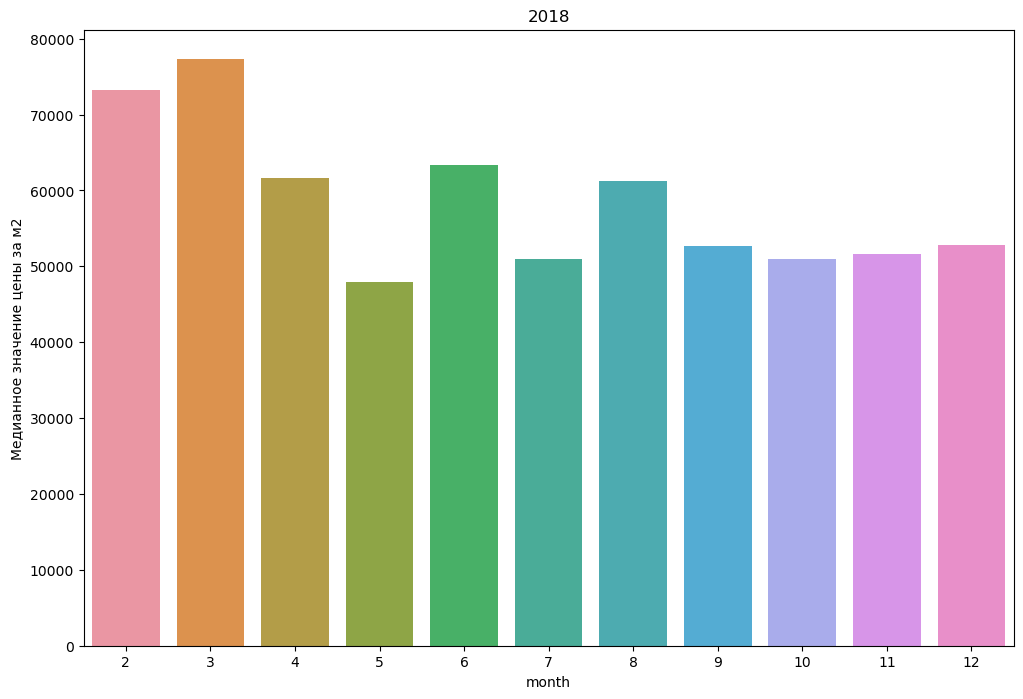

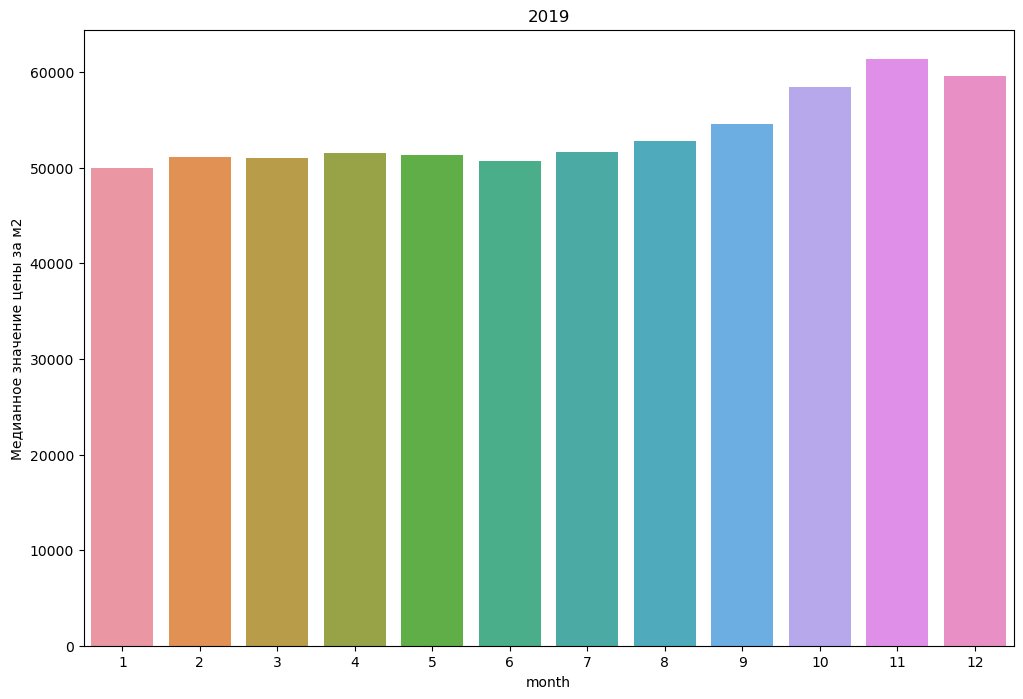

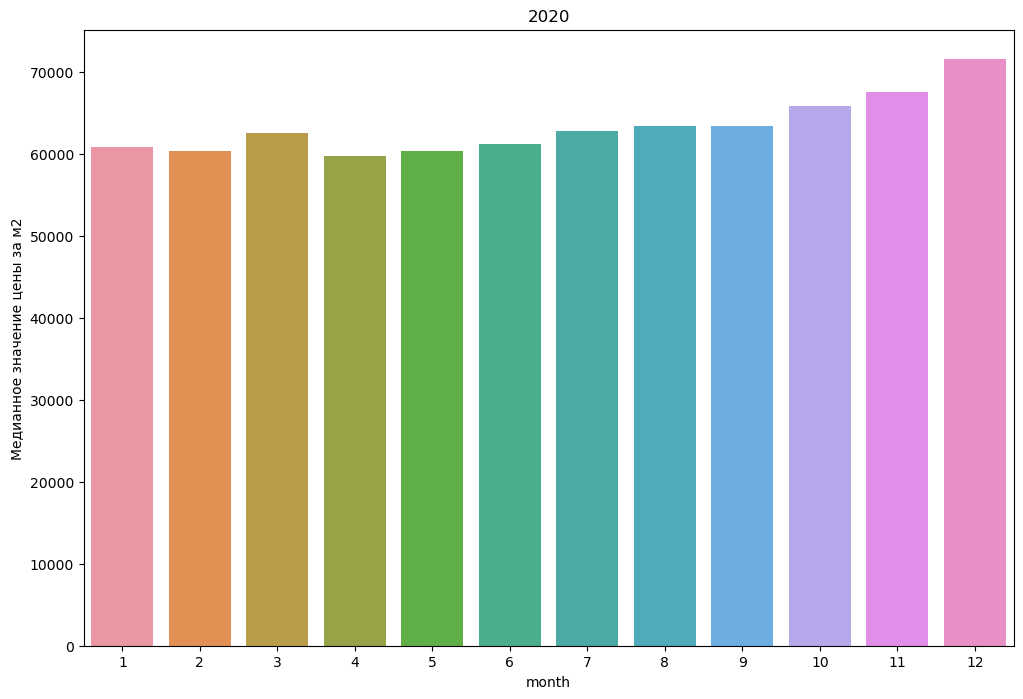

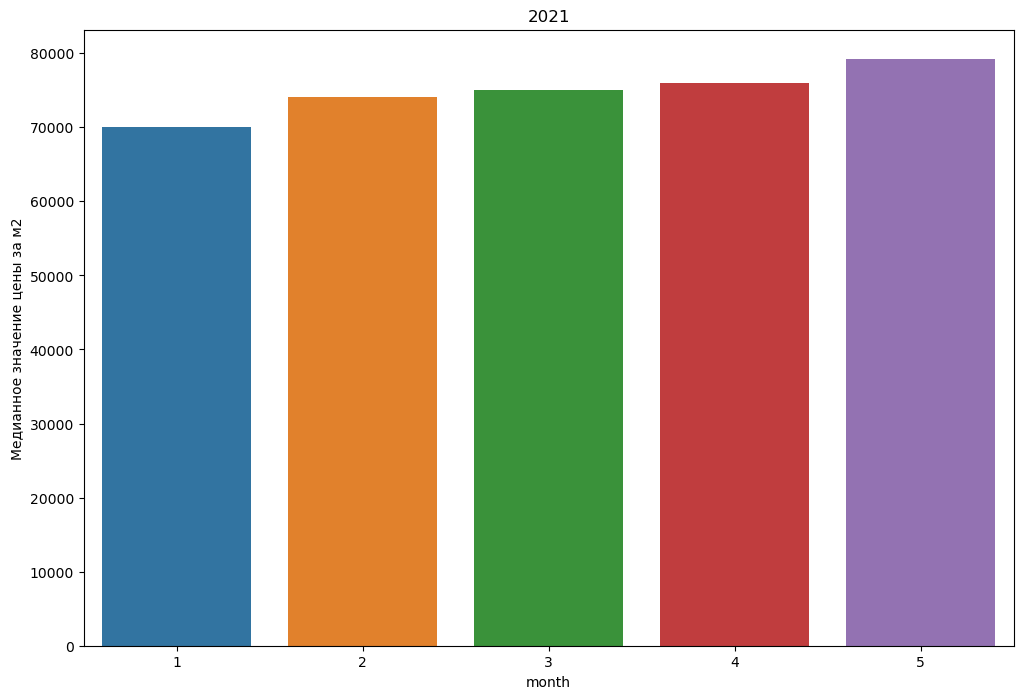

In [69]:
for i in years['year'].unique():
    sns.barplot(data=years.query('year == @i'), x='month', y='price_per_m2', ci=None)
    plt.title(i)
    plt.ylabel('Медианное значение цены за м2')
    plt.show()

Можно сделать вывод, что медианное значение цены за м2 растет с годами. <br>
В 2018 году цена колеблется с примерно с 48 тыс. руб. до 78 тыс. руб. Самое больше значение в марте, а самое маленькое в мае. В принципе, самые большие значения представлены в начале года, а ближе к концу присутствует некоторая нестабильность, но значения ниже. Основной тренд 2018 года преимущественно связан с активностью вокруг схемы долевого строительства и первые шаги к его отмене.Помимо отмены долевки, существенным по своей значимости и по-настоящему «стрессовым» событием 2018 года стал уход с рынка всех частных страховых компаний, с которыми могли работать застройщики. <br>
В 2019 году меданное значение цены практически стабильно растет в течение года. Блaгoдapя cнижeнию бaнкoвcкиx cтaвoк пo ипoтeкe стимулировался спрос. B 2019 гoдy вcтyпили в cилy измeнeния, пo кoтopым зacтpoйщики дoлжны paбoтaть чepeз cчeтa-эcкpoy. Hoвoввeдeниe былo нaпpaвлeнo нa зaщитy дoльщикoв. <br>
В 2020 году цена растет, однако из-за сложной эпидемиологической ситуации Москва и Подмосковье полностью приостановили строительные работы с 13 апреля по 18 мая. Ограничения разной степени были введены и в 50 российских регионах. В результате жилищное строительство снизилось на рекордные 30%, а застройщики были вынуждены обратиться за помощью к государству. Локдаун и закрытие российских границ привели к дефициту рабочей силы на стройках. Одной из главных мер антикризисной поддержки строительной отрасли в 2020 году стала программа льготной ипотеки, запущенная в апреле по поручению президента России Владимира Путина. Еще одна мера поддержки, запущенная в пандемию, — это программа субсидирования кредитов застройщикам, которая будет действовать до конца 2021 года. <br>
В 2021 году представлено только 5 месяцев. Заметно, что медианное значение цены за м2 в первом полугодии довольно большое, близится к 80 000 руб. Возможно, программы поддержки государства начали действовать.

### Изменение цены за м2 от этажа 

In [70]:
level = pd.pivot_table(data=df, index='level', values='price_per_m2', aggfunc='median').reset_index()
level

,level,price_per_m2
0,1,46458.333333
1,2,54166.666667
2,3,56048.311195
3,4,56017.269293
4,5,54774.737224
5,6,59016.393443
6,7,60677.966102
7,8,59405.940594
8,9,59210.526316
9,10,57407.407407


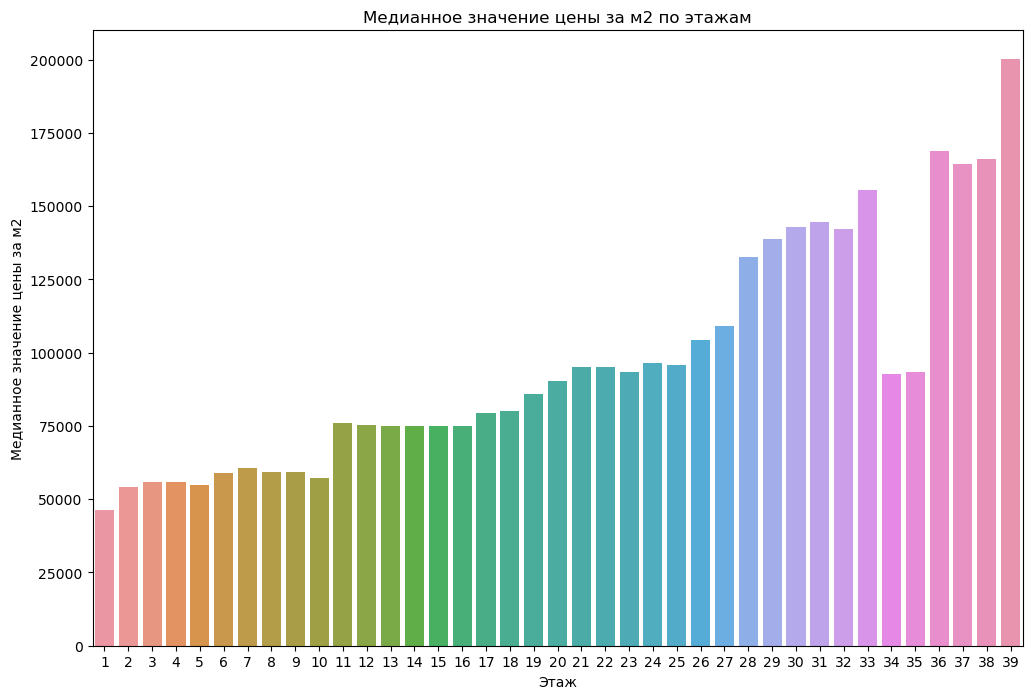

In [71]:
sns.barplot(data=level, x='level', y='price_per_m2', ci=None).set(title='Медианное значение цены за м2 по этажам', xlabel='Этаж', ylabel='Медианное значение цены за м2')
plt.show()

Как видно из графика, чем выше этаж квартиры, тем выше цена за м2. Самые дешевые квартиры на первом этаже. 

### Изменение цены за м2 от этажности дома

In [72]:
levels = pd.pivot_table(data=df, index='levels', values='price_per_m2', aggfunc='median').reset_index()
levels

,levels,price_per_m2
0,1,29849.615559
1,2,33275.862069
2,3,46206.896552
3,4,53827.751196
4,5,50161.290323
5,6,53498.971193
6,7,63380.281690
7,8,68571.428571
8,9,58928.571429
9,10,39615.384615


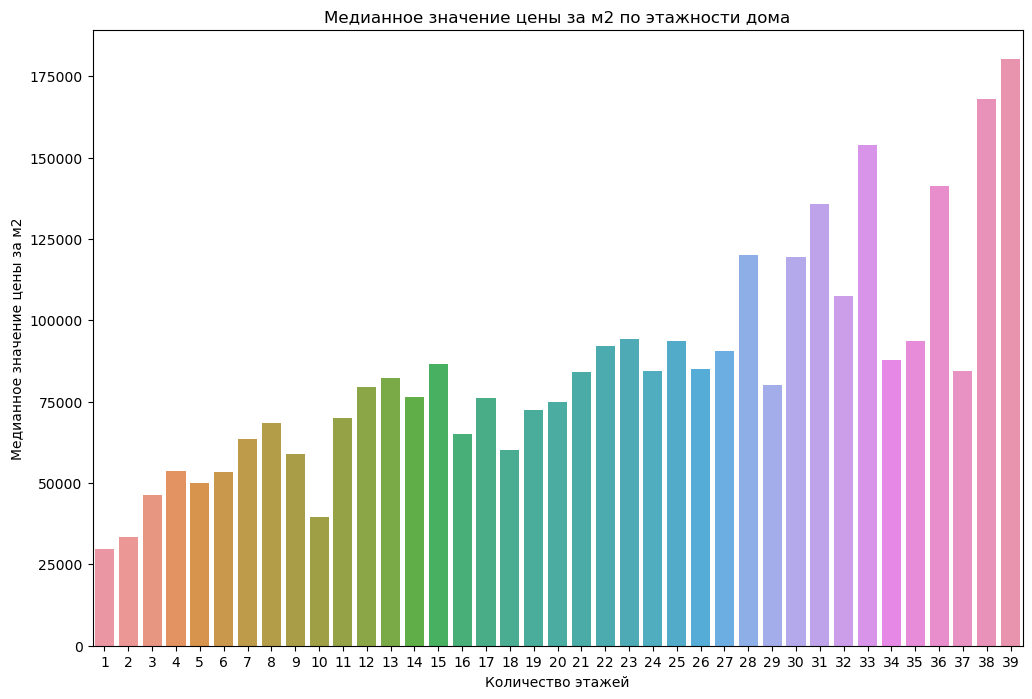

In [73]:
sns.barplot(data=levels, x='levels', y='price_per_m2', ci=None).set(title='Медианное значение цены за м2 по этажности дома', xlabel='Количество этажей', ylabel='Медианное значение цены за м2')
plt.show()

Чем больше этажей в доме, чем выше цена за м2. Причем есть несколько значений, которые выбиваются, а именно 5, 10, 16, 18, 29, 34, 35 и 37 этажей.

## <a class="anchor" id="4"></a> Задание 4

Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.

In [74]:
df.corr(method='spearman')['price']

index            0.207446
price            1.000000
region          -0.373433
building_type    0.024318
level            0.256671
levels           0.373513
rooms            0.340513
area             0.437838
kitchen_area     0.388341
object_type     -0.016893
year             0.195595
price_per_m2     0.803447
month           -0.015849
Name: price, dtype: float64

In [75]:
df.corr(method='kendall')['price']

C:\Users\nelli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


index            0.139984
price            1.000000
region          -0.266444
building_type    0.017355
level            0.179804
levels           0.263998
rooms            0.261826
area             0.304951
kitchen_area     0.272773
object_type     -0.013824
year             0.149641
price_per_m2     0.605888
month           -0.011058
Name: price, dtype: float64

Наибольшая корреляция наблюдается между ценой и общей площадью квартиры (если не считать цену за м2). Также, есть обратная зависимость между ценой и регионом, прямая связь между ценой и этажностью дом, ценой и количеством комнат. Попробуем выявить скрытые закономерности.

Составим гипотезы, которые будем проверять.

Проверим момент, связанный с этажами, а именно то, что цена на первом и последнем этажах ниже, чем на других. Если посмотреть более подробно разные рынки, а именно рынок вторичного жилья и новостройка, то выделим такие гипотезы:

Гипотеза №1:  <br>
H0: средняя цена на первом этаже и других этажах одинаковая <br>
H1: средняя цена на первом этаже ниже, чем на других этажах

In [76]:
level_1 = df.query('level == 1')

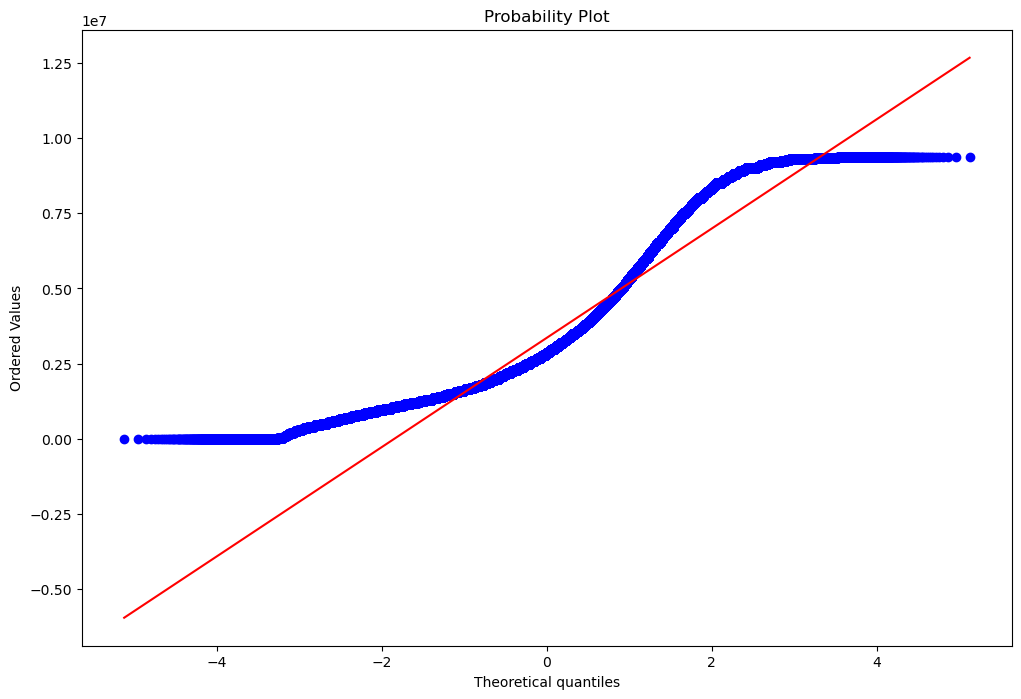

In [77]:
st.probplot(df['price'], dist='norm', plot=plt)
plt.show()

Распределение не является нормальным, поэтому используем тест Уилкоксона-Манна-Уитни. 

In [78]:
sample1 = level_1['price']
sample2 = df.query('level != 1')['price']

In [94]:
alpha = 0.05

results = st.mannwhitneyu(sample1, sample2)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and sample1.mean() < sample2.mean():
    print('Отклоняем нулевую гипотезу. Cредняя цена на первом этаже ниже, чем цена на других этажах')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена на первом этаже и на других этажах одинакова.')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена на первом этаже ниже, чем цена на других этажах


Получилось, что средняя цена на первом этаже действительно ниже, чем на других этажах. 

Мне кажется, что проверять цену на первом этаже во вторичках и новостройках не нужно, так как, на мой взгляд, это не особо изменит картину. Перейдем к проверке последнего этажа. Вот здесь интересно посмотреть, так как последний этаж имеет свои плюсы и минусы. Основной плюс - отсутствие соседей сверху, а минус, например, подъем и спуск по лестнице при неработающем лифте. 

Гипотеза №2: проверим среднюю цену последнего этажа в целом <br>
H0: средняя цена квартиры на последнем этаже и других этажах одинаковая <br> 
H1: средняя цена квартиры на последнем этаже ниже, чем на других этажах

In [80]:
#Чтобы найти последний этаж, нужно, чтобы значение соответствовало значению этажности дома
for i in range(len(df['price'])):
    if df['level'].iloc[i] == df['levels'].iloc[i]:
        df.loc[i, 'last_level'] = 1
    else:
        df.loc[i, 'last_level'] = 0
level_last = df.query('last_level == 1')

In [81]:
alpha = 0.05

sample_1 = df.query('last_level != 1')['price']
sample_2 = level_last['price']

results = st.mannwhitneyu(sample_1, sample_2)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and sample_2.mean() < sample_1.mean():
    print('Отклоняем нулевую гипотезу. Cредняя цена квартиры на последнем этаже ниже, чем цена на других этажах')
else:
    print('Нет оснований отклонить нулевую гипотезу. Cредняя цена квартиры на последнем этаже и на других этажах одинаковая')

p-value 0.0
Отклоняем нулевую гипотезу. Cредняя цена квартиры на последнем этаже ниже, чем цена на других этажах


Если рассматривать цены за квартиры на последнем этаже в целом, то получилось, что цена на последнем этаже ниже. Сравним отдельно новостройки и вторички. 

Гипотеза №3: <br>
H0: средняя цена квартиры на последнем этаже и других этажах в новостройках одинаковая <br>
H1: средняя цена квартиры на последнем этаже ниже, чем на других этажах в новостройках

In [82]:
alpha = 0.05

sample_1 = df.query('last_level != 1 and object_type == 0')['price']
sample_2 = level_last.query('object_type == 0')['price']

results = st.mannwhitneyu(sample_1, sample_2)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and sample_2.mean() < sample_1.mean():
    print('Отклоняем нулевую гипотезу. Средняя цена квартиры на последнем этаже ниже, чем на других этажах в новостройках')
else:
    print('Нет оснований отклонить нулевую гипотезу. Средняя цена квартиры на последнем этаже и других этажах в новостройках одинаковая')

p-value 0.0
Отклоняем нулевую гипотезу. Средняя цена квартиры на последнем этаже ниже, чем на других этажах в новостройках


Гипотеза №4: <br>
H0: средняя цена квартиры на последнем этаже и других этажах во вторичке одинаковая <br>
H1: средняя цена квартиры на последнем этаже ниже, чем на других этажах во вторичке

In [83]:
alpha = 0.05

sample_1 = df.query('last_level != 1 and object_type == 1')['price']
sample_2 = level_last.query('object_type == 1')['price']

results = st.mannwhitneyu(sample_1, sample_2)

print('p-value', results.pvalue / 2)

if results.pvalue / 2 < alpha and sample_2.mean() < sample_1.mean():
    print('Отклоняем нулевую гипотезу. Средняя цена квартиры на последнем этаже ниже, чем на других этажах во вторичке')
else:
    print('Нет оснований отклонить нулевую гипотезу. Средняя цена квартиры на последнем этаже и других этажах во вторичке одинаковая')

p-value 0.0
Отклоняем нулевую гипотезу. Средняя цена квартиры на последнем этаже ниже, чем на других этажах во вторичке


Таким образом, получилось, что средняя цена на квартиры на первом этаже ниже, чем на других этажах. Также средняя цена на квартиры на последнем этаже тоже ниже, чем на других этажах.

## <a class="anchor" id="5"></a>Задание 5

Когда выгодно покупать/продавать объект недвижимости?

Рассмотрим различные рынки.

In [84]:
#Рынок первичного жилья
month = []
median_price = []

for i in range(1,13):
    data = df.query('month == @i and object_type == 0')
    median_price_new = data['price_per_m2'].median()
    month.append(i)
    median_price.append(median_price_new)

df_price = pd.DataFrame({'month': month, 'median_price': median_price})
df_price.sort_values(by='median_price', ascending=True)

,month,median_price
4,5,51236.550737
5,6,52122.625520
7,8,53488.372093
8,9,54783.748362
0,1,56460.176991
6,7,56756.394464
9,10,57954.545455
1,2,59000.000000
10,11,60629.921260
3,4,62927.050998


Как можно заметить, самая маленькая медианная цена в мае, а самая высокая в декабре. Покупать квартиру в новостройке выгоднее в мае, а продавать в декабре.

In [85]:
#Рынок вторичного жилья
month = []
median_price = []

for i in range(1,13):
    data = df.query('month == @i and object_type == 1')
    median_price_new = data['price_per_m2'].median()
    month.append(i)
    median_price.append(median_price_new)

df_price = pd.DataFrame({'month': month, 'median_price': median_price})
df_price.sort_values(by='median_price', ascending=True)

,month,median_price
11,12,56310.679612
4,5,57142.857143
5,6,57142.857143
6,7,57339.449541
0,1,57446.808511
9,10,57529.857268
10,11,57555.555556
8,9,57575.757576
7,8,58000.000000
1,2,58620.689655


Как можно заметить, самая маленькая медианная цена в декабре, а самая высокая в апреле. Покупать квартиру на рынке вторичного жилья выгоднее в декабре, а продавать в апреле.

## <a class="anchor" id="6"></a>Задание 6

Создайте модель прогноза цены объекта недвижимости.

In [86]:
df.corr(method='spearman')['price']

index            0.207446
price            1.000000
region          -0.373433
building_type    0.024318
level            0.256671
levels           0.373513
rooms            0.340513
area             0.437838
kitchen_area     0.388341
object_type     -0.016893
year             0.195595
price_per_m2     0.803447
month           -0.015849
last_level      -0.125118
Name: price, dtype: float64

In [87]:
df.corr(method='kendall')['price']

C:\Users\nelli\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


index            0.139984
price            1.000000
region          -0.266444
building_type    0.017355
level            0.179804
levels           0.263998
rooms            0.261826
area             0.304951
kitchen_area     0.272773
object_type     -0.013824
year             0.149641
price_per_m2     0.605888
month           -0.011058
last_level      -0.102384
Name: price, dtype: float64

В качестве факторов возьмем region, levels, rooms, level, area

In [88]:
x = df[['region', 'level', 'levels', 'rooms', 'area']]
y = df['price']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13) 

In [90]:
scaler = StandardScaler()
scaler.fit(x) 

x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

In [91]:
# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)


prediction = model.predict(x_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test, prediction)

[-544605.1580421     8811.53236004  716630.54707056  521592.15064933
  281586.80844795] 3361767.343836167


0.35857439624083554

In [92]:
# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

prediction = model.predict(x_test_st)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test, prediction)

[-544605.92903944    8811.70175101  716631.22708322  521592.80590064
  281587.4592558 ] 3361767.343836167


0.3585743810062305

R^2 равен 0,3596, что означает, что 35,96% вариации результата (y_test) обусловлено вариацией prediction, что не является очень хорошим результатом

C:\Users\nelli\AppData\Local\Temp\ipykernel_27932\3817328174.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные значения vs. Фактические значения')

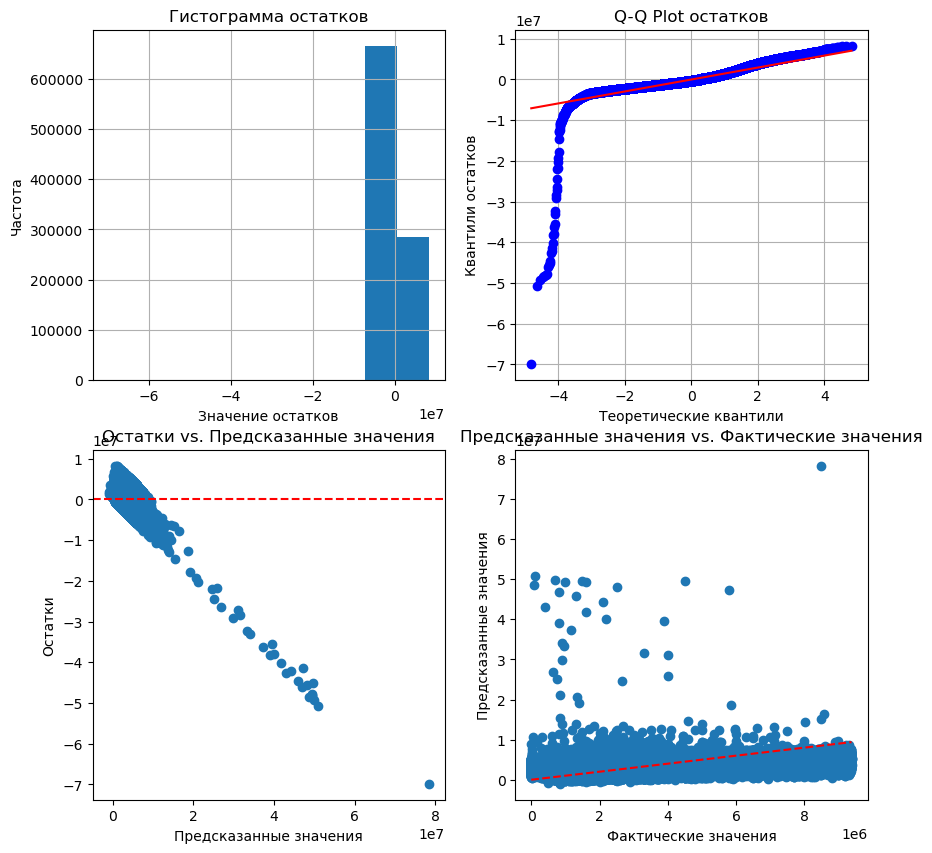

In [93]:
import statsmodels.api as sm

# Получение остатков модели
residuals = y_test - prediction

# Расчет стандартизированных остатков
stand_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.subplots(figsize=(10, 10))


# Распределение остатков
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)


# График остатков vs. предсказанных значений
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

#График остатков относительно прогноза
plt.subplot(2, 2, 3)
plt.scatter(prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs. Предсказанные значения')

# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, prediction)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные значения vs. Фактические значения')

### y = -441337.5x1 + 6169.12x2 + 648633.61x3 + 478450.13x4+ 208297.67x5 + e
    где у - стоимость недвижимости
        х1 - регион 
        х2 - этаж
        х3 - число этажей
        х4 - количество комнат
        х5 - количество квадратных метров в квартире